<a href="https://colab.research.google.com/github/Rgvk1/my-projects/blob/main/Ecommerce_Campaign_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:**
To conduct a thorough exploratory data analysis (EDA) and hypothesis testing on two comprehensive datasets one containing information on customers visiting the shopping site for purchase and another that has demographic, purchase, and marketing information about the group of people

# **Dataset 2:Campaign dataset**

In [ ]:
#Uploading Dataset2
from google.colab import files
uploaded = files.upload()

Saving campaign - campaign.csv to campaign - campaign.csv


In [ ]:
df2=pd.read_csv('campaign - campaign.csv')

In [ ]:
df2.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,7,5,2,0,0,0,0,0,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,10,7,6,1,0,0,0,0,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,1,3,5,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,2,9,4,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,2,9,4,0,0,0,0,0,0,IND


## **1.Preprocessing of Data**

In [ ]:
df2.shape
#shape of Data

(2239, 27)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [ ]:
#Remove $ and , symbol from income and convert to float

df2['Income'] = df2['Income'].str.replace('$', '').str.replace(',', '').astype('float')

In [ ]:
#convert Dt_customer to datetime
df2['Dt_Customer']=pd.to_datetime(df2['Dt_Customer'])

<ipython-input-57-603524e6930d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Dt_Customer']=pd.to_datetime(df2['Dt_Customer'])


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   object        
 3   Marital_Status       2239 non-null   object        
 4   Income               2215 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-nul

In [ ]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [ ]:
df2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
count,2239.000000,2239.000000,2215.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,51969.861400,0.443948,0.506476,2013-07-10 10:26:25.350603008,49.121036,304.067441,26.307727,167.016525,...,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2827.500000,1959.000000,35284.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,174.000000,8.000000,67.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8423.500000,1977.000000,68487.000000,1.000000,1.000000,2013-12-30 12:00:00,74.000000,504.500000,33.000000,232.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.372471,11.985494,21526.320095,0.538390,0.544555,NaN,28.963662,336.614830,39.781468,225.743829,...,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412


In [ ]:
#Checking for missing values
df2.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Inference:
There are 24 values missing under income. We shall fill the value with mean income

In [ ]:
df2[df2['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,0,3,7,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,CA
589,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,GER
898,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,2,6,5,0,0,0,0,0,0,US
996,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,GER
1095,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,0,2,7,0,0,0,0,0,0,AUS
1184,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,10,4,3,0,0,0,0,0,0,AUS


In [ ]:
df2['Income']=df2['Income'].fillna(df2['Income'].mean())

In [ ]:
df2.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Inference: Now data has no missing values and is ready for analysis.

In [ ]:
#Check duplicates and found there are no duplicates
df2.duplicated().sum()

0

In [ ]:
df2['Month_of_Enrollment']=df2['Dt_Customer'].dt.month
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Month_of_Enrollment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,0,SP,6
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,0,CA,6
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,US,5
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,AUS,5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,0,SP,4


In [ ]:
df2['Year_of_Enrollment']=df2['Dt_Customer'].dt.year
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Month_of_Enrollment,Year_of_Enrollment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,0,SP,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,0,CA,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,US,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,AUS,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,0,SP,4,2014


In [ ]:
df2['Income'].max()

162397.0

In [ ]:
df2['Income'].min()

1730.0

In [ ]:
df2['Income'].median()

51717.0

**Feature Engineering:**Adding an Income Bin coloumn by checking the median income. Those below median income are categorized as low income and those above median value are considered as High income in this study

In [ ]:
df2['income_bins']=pd.cut(df2['Income'],bins=(1000,51717,170000),labels=('low_income','high_income'))


In [ ]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Month_of_Enrollment,Year_of_Enrollment,income_bins
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,0,SP,6,2014,high_income
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,0,CA,6,2014,high_income
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,5,2014,high_income
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,5,2014,low_income
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,0,SP,4,2014,low_income


### **2.EDA on various features and columns.**

In [ ]:
#Unique and Value counts
def dist_check(df, col_name):
  print("Unique values : ", df[col_name].unique())
  print("Value counts : ")
  print(df[col_name].value_counts())

In [ ]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Country', 'Month_of_Enrollment',
       'Year_of_Enrollment', 'income_bins'],
      dtype='object')

In [ ]:
col_list = ['Year_Birth', 'Education', 'Marital_Status', 'income_bins', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Country', 'Month_of_Enrollment',
       'Year_of_Enrollment']
for col in col_list:
  print(col, " -")
  dist_check(df2, col)
  print("\n")

Year_Birth  -
Unique values :  [1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]
Value counts : 
Year_Birth
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1959    51
1977    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
190

**Inference:**
•	Customers born in the 1970s have made more purchases.

•	Higher number of Customers are people with Education level of Graduation

•	Married and together form more than 50% of the customer pool.

•	About 1293 customers have no kids.

•	More number of customers are likely to make a purchase within 2-3 months else they are at risk of churn.

•	Most customers spend about 1-5 $ in wines.

•	There are around 3-7 web visits per month for many customers.

•	Country SP has maximum customers.

•	2013 had maximum enrolments.


In [ ]:
df_num2=df2.select_dtypes(include=np.number)
df_num2.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Month_of_Enrollment,Year_of_Enrollment
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,6,1,0,0,0,0,0,0,6,2014
1,1,1961,57091.0,0,0,0,464,5,64,7,...,7,5,0,0,0,0,1,0,6,2014
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,5,2,0,0,0,0,0,0,5,2014
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,2,7,0,0,0,0,0,0,5,2014
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,2,7,1,0,0,0,0,0,4,2014


In [ ]:
df_num2.drop('ID',axis=1,inplace=True)

In [ ]:
df_num2.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Month_of_Enrollment,Year_of_Enrollment
0,1970,84835.0,0,0,0,189,104,379,111,189,...,6,1,0,0,0,0,0,0,6,2014
1,1961,57091.0,0,0,0,464,5,64,7,0,...,7,5,0,0,0,0,1,0,6,2014
2,1958,67267.0,0,1,0,134,11,59,15,2,...,5,2,0,0,0,0,0,0,5,2014
3,1967,32474.0,1,1,0,10,0,1,0,0,...,2,7,0,0,0,0,0,0,5,2014
4,1989,21474.0,1,0,0,6,16,24,11,0,...,2,7,1,0,0,0,0,0,4,2014


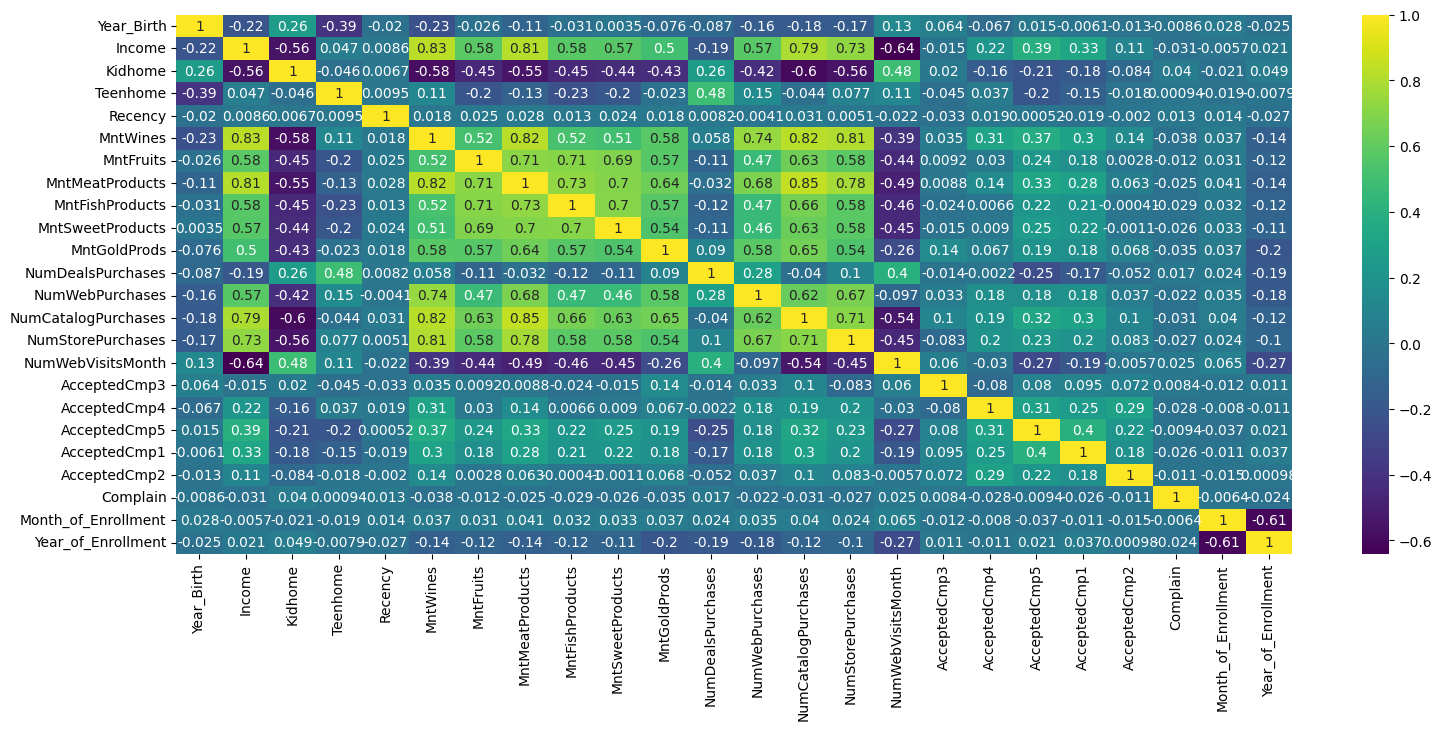

In [ ]:
# Correlation Heatmap -

plt.figure(figsize=(18, 7))
sns.heatmap(df_num2.corr(method='spearman'),
            annot=True, cmap='viridis')
plt.show()

**Inference:**
•	Income is highly correlated to Amount of wine,meat,catalogue purchase store purchases. Higher income higher the amount spend on these.

•	Kids at home is correlated to Webvisits per month

•	People who prefer to buy wine also have greater chance of buying meat.

•	Number of deal purchases are higher if there are teen at home and while using web purchase.


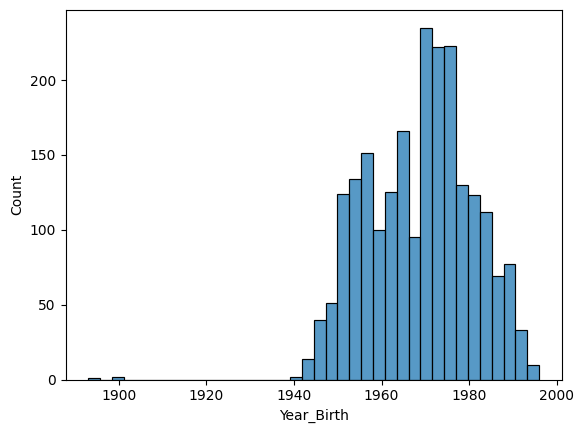

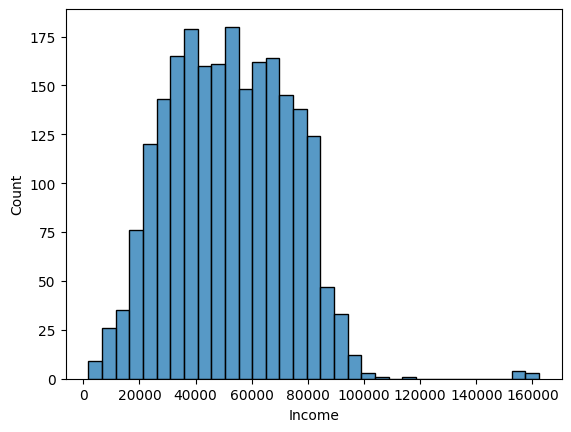

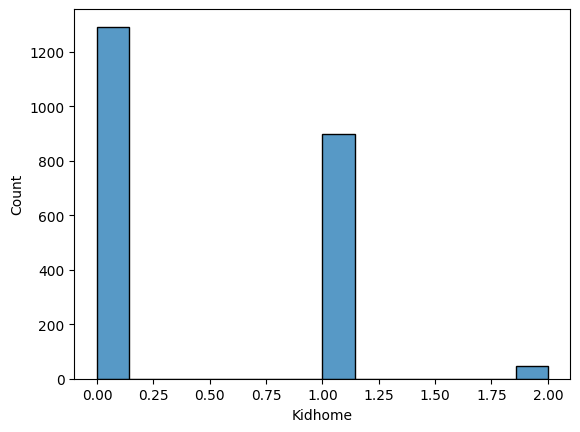

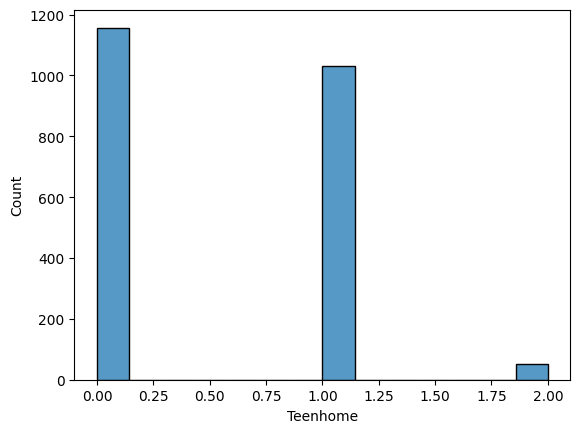

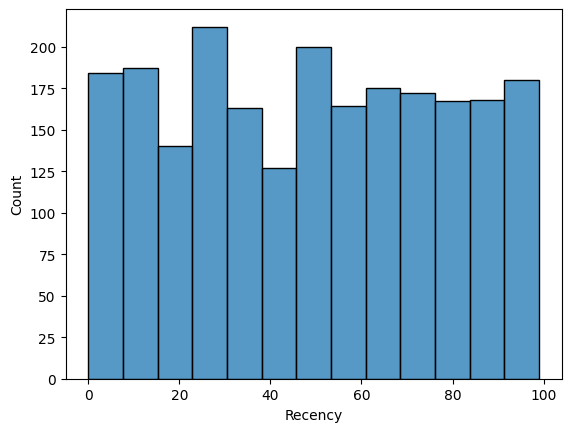

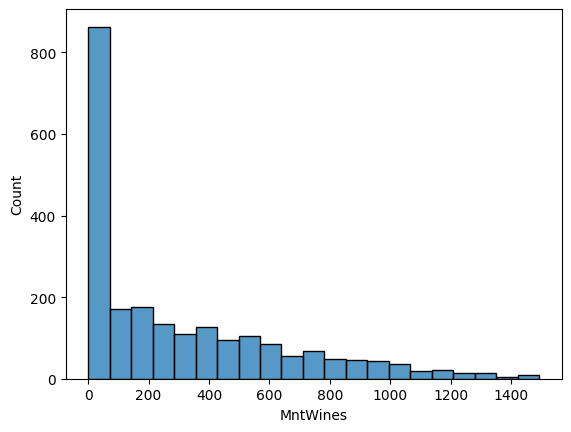

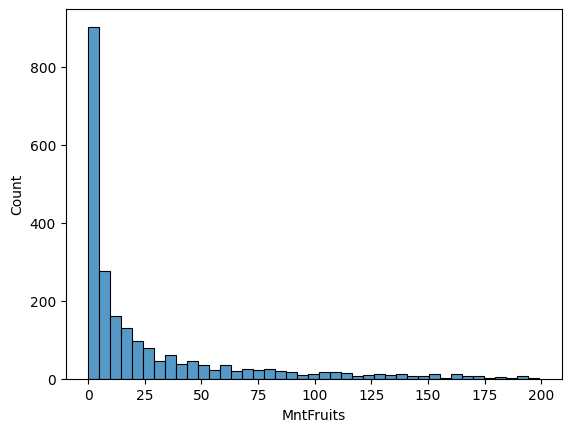

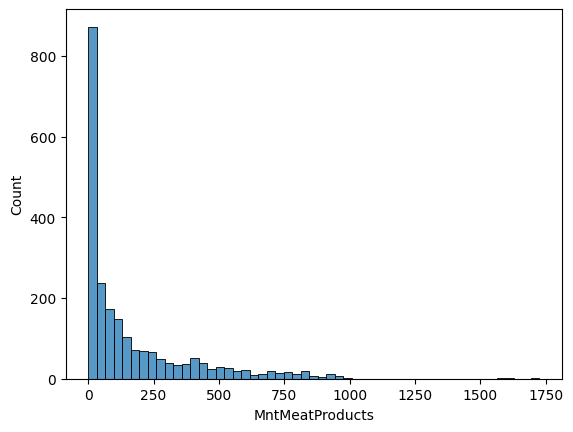

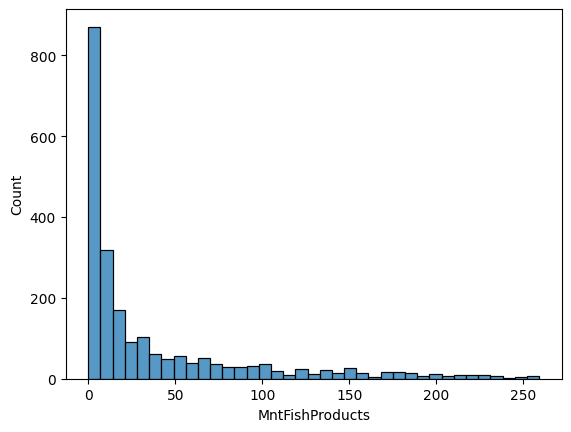

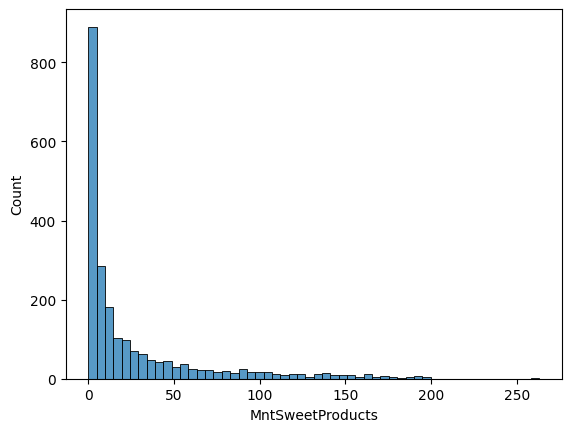

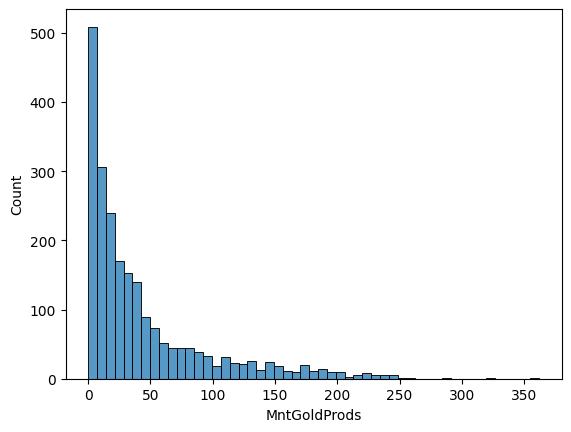

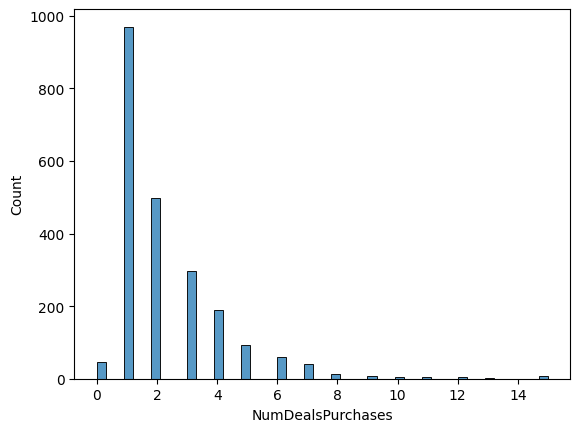

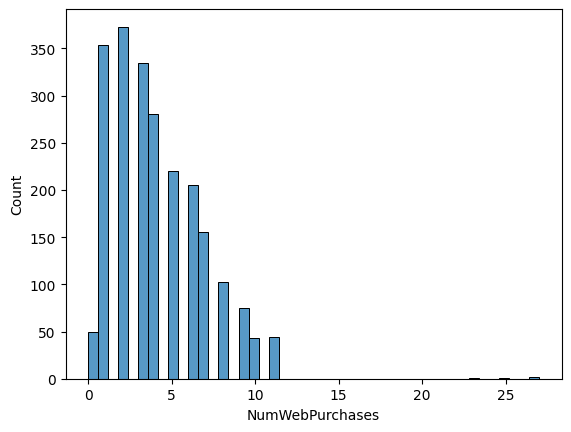

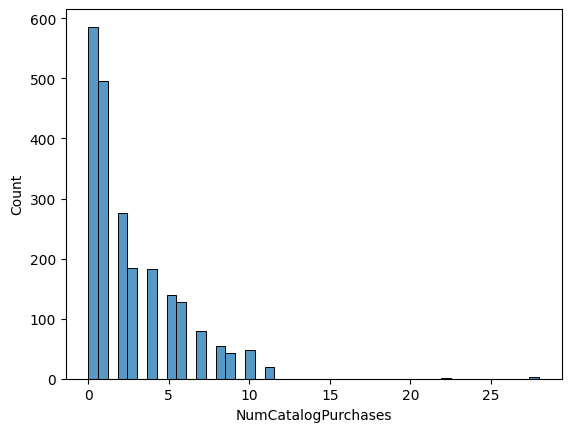

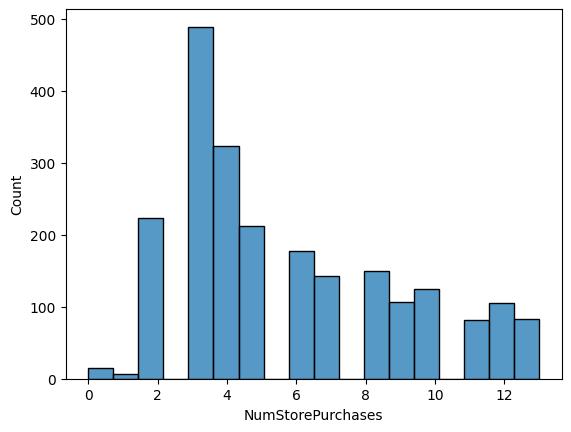

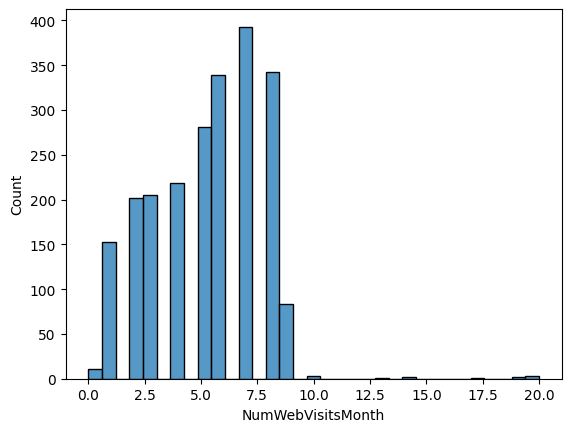

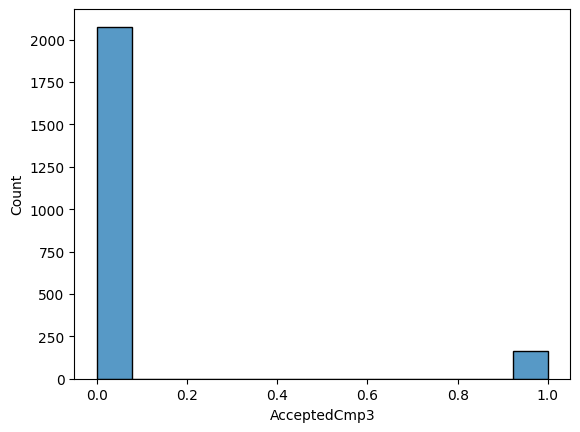

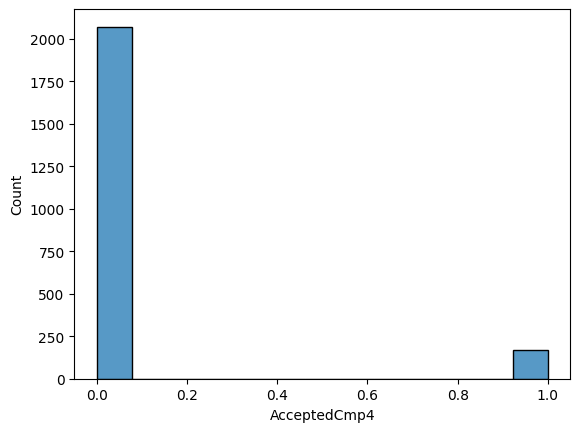

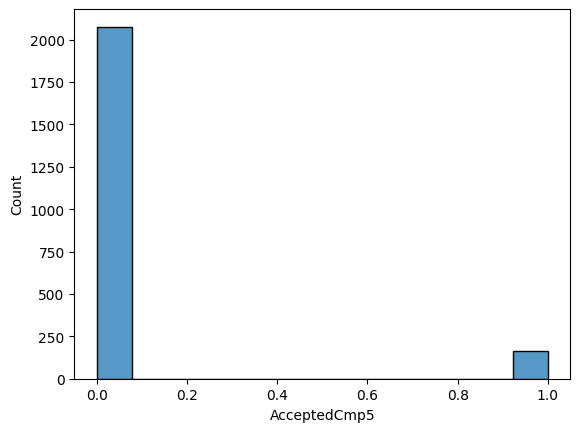

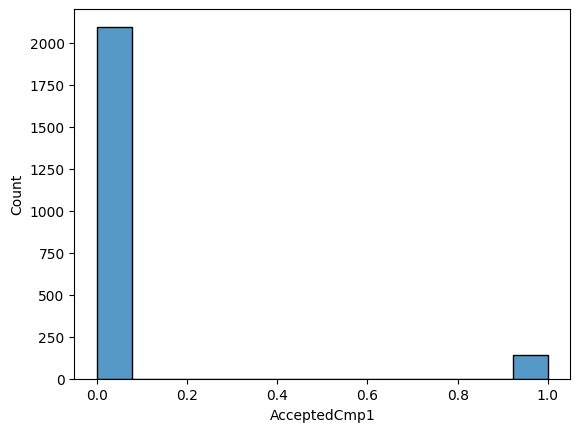

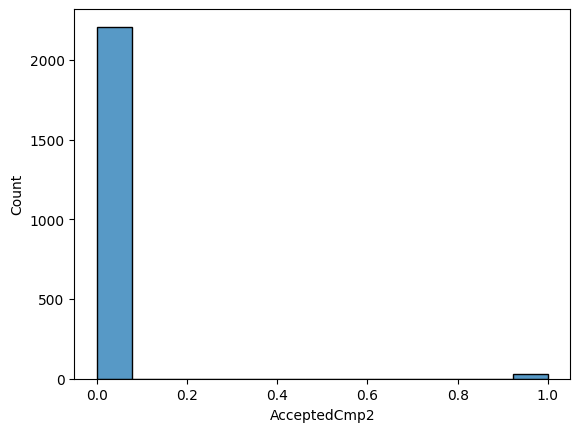

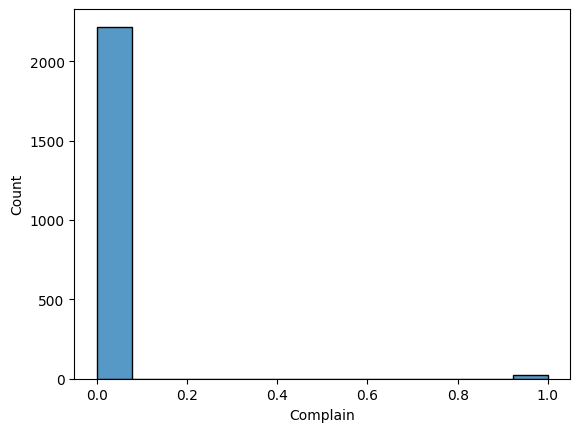

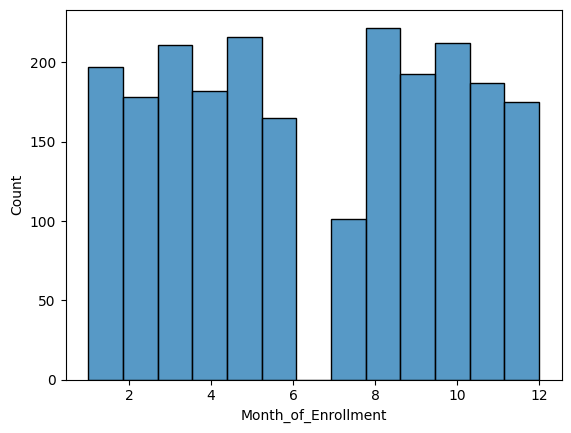

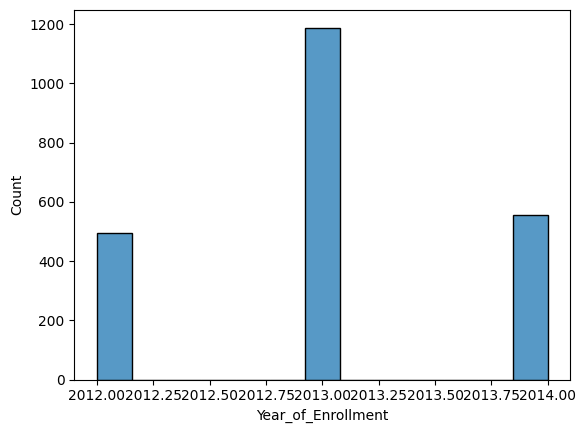

In [ ]:
#Histplot for numerical variables
for col in enumerate(df_num2):
    sns.histplot(x=col[1],data=df_num2)
    plt.show()

*Inference:*
•	Income and Year of birth are almost normally distributed.

•	Recency is highest around a month

•	There is about 3 store purchases with highest value

•	7 web visits a month is the highest.


In [ ]:
df_cat2=df2.select_dtypes(include='object' )
df_cat2.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


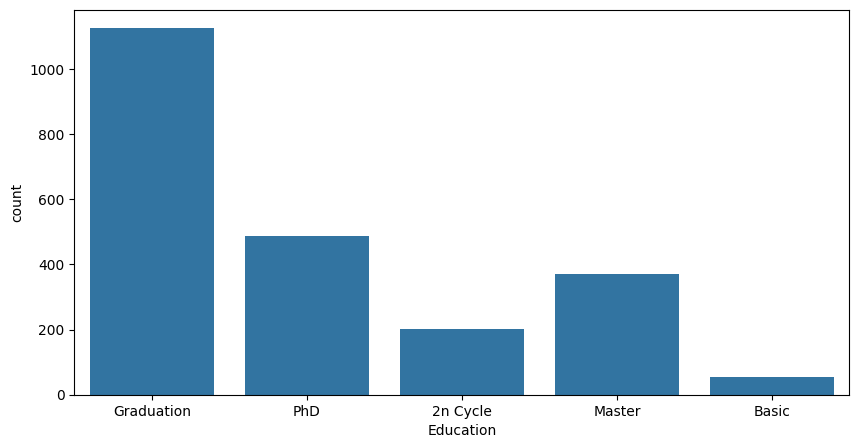

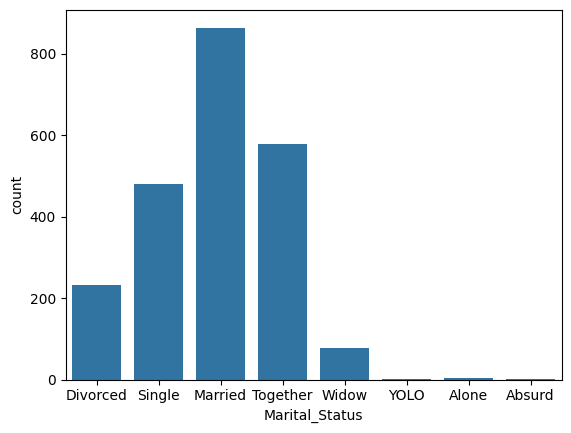

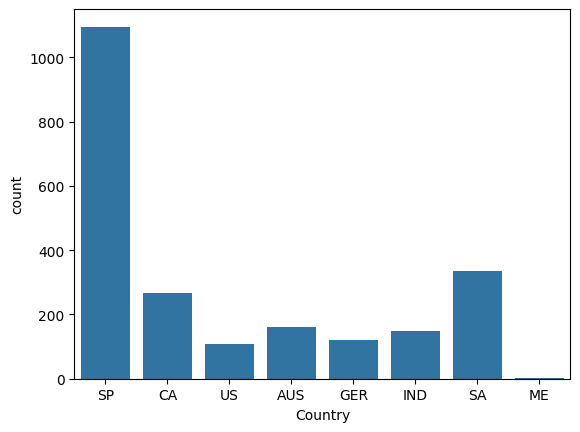

In [ ]:
#Countplot for Categorical Variables
fig = plt.figure(figsize = (10,5))
for col in enumerate(df_cat2):
    sns.countplot(x=col[1],data=df_cat2)
    plt.show()

Inference: Similar inference as given in value count can be seen

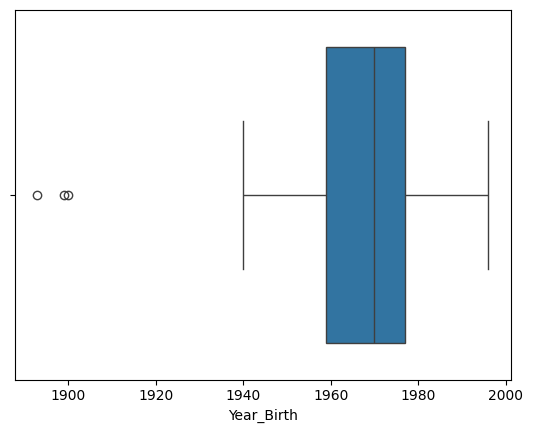

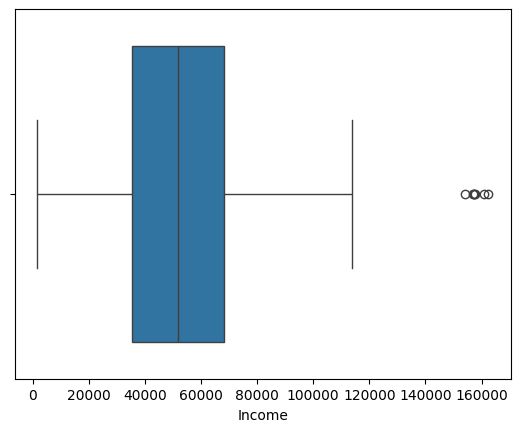

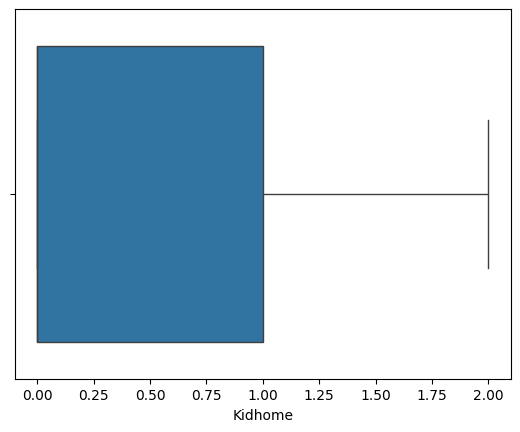

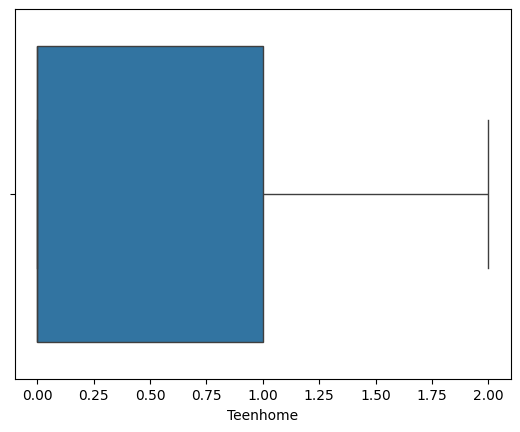

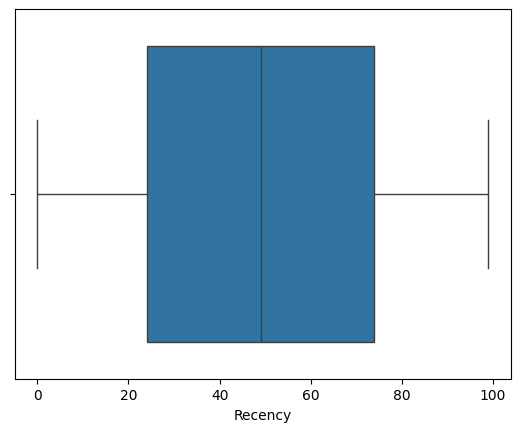

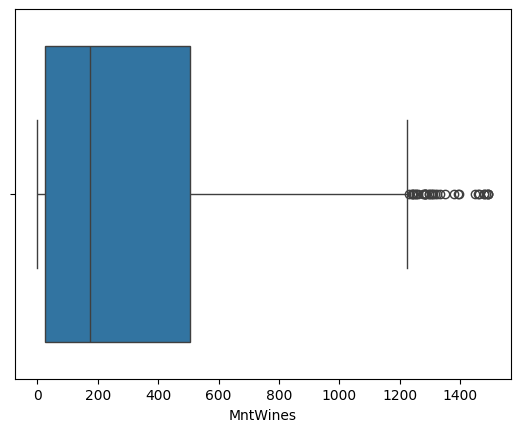

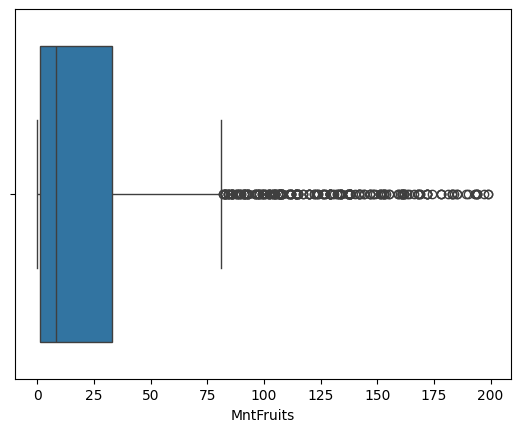

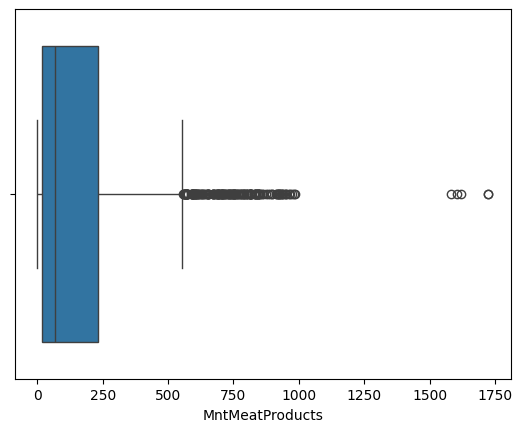

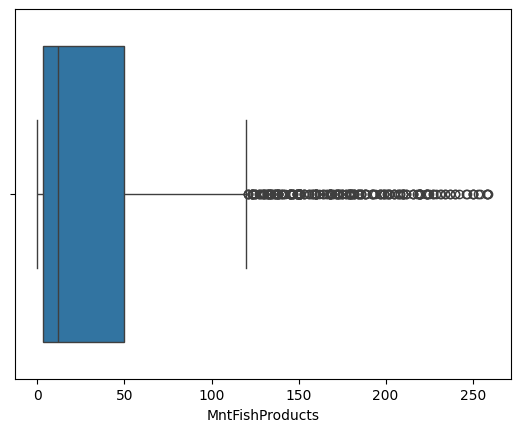

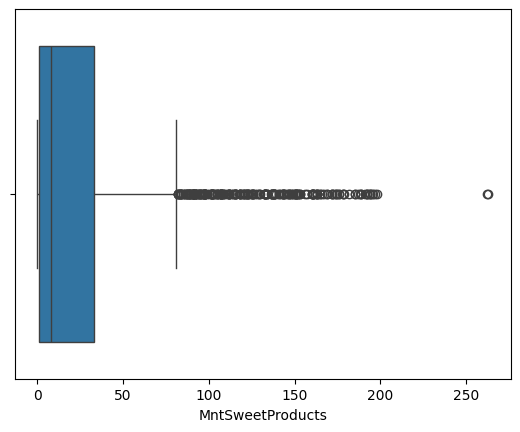

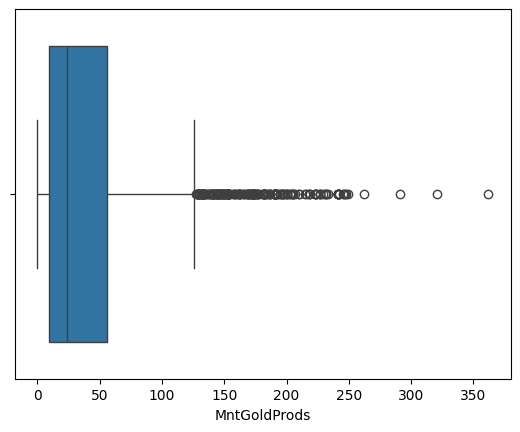

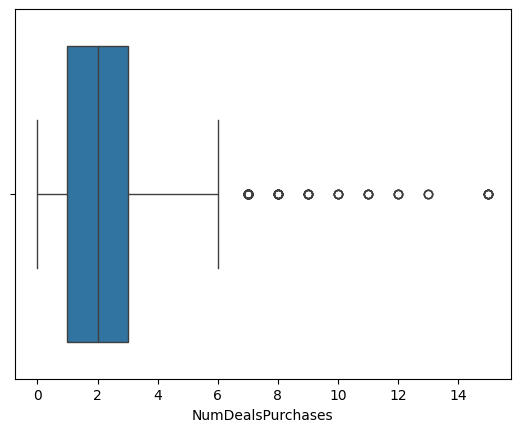

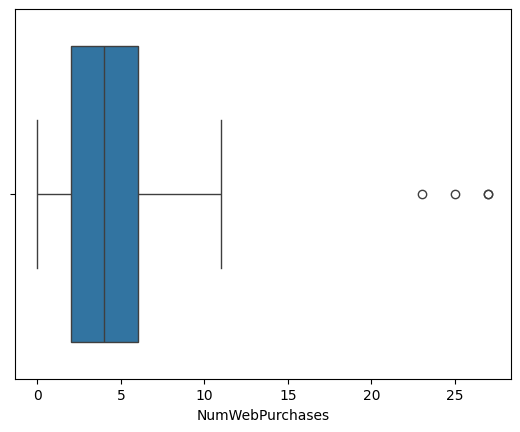

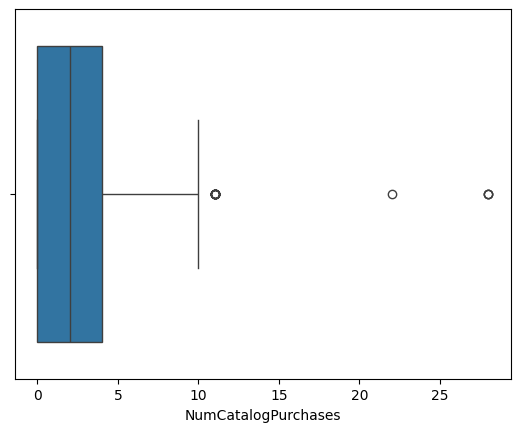

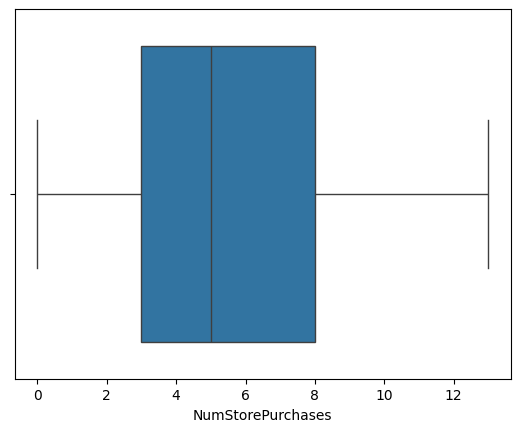

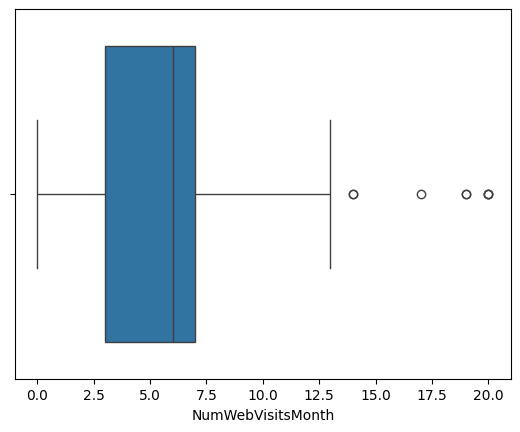

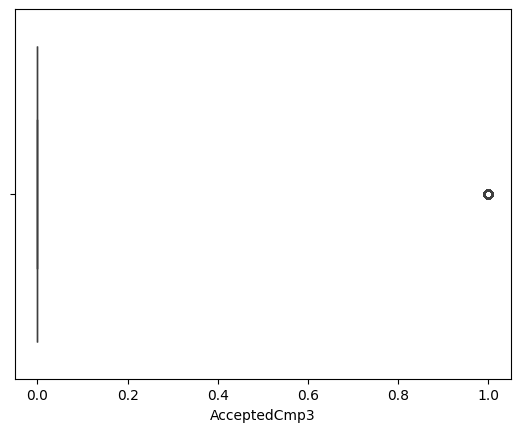

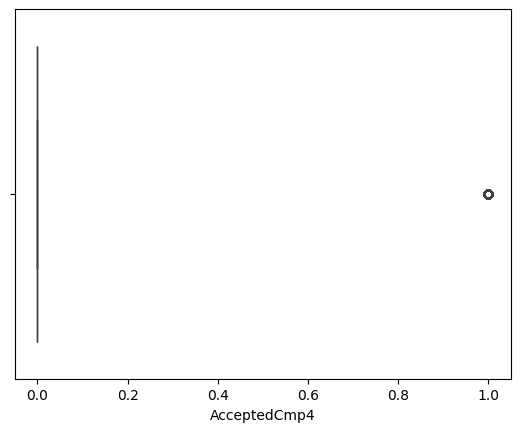

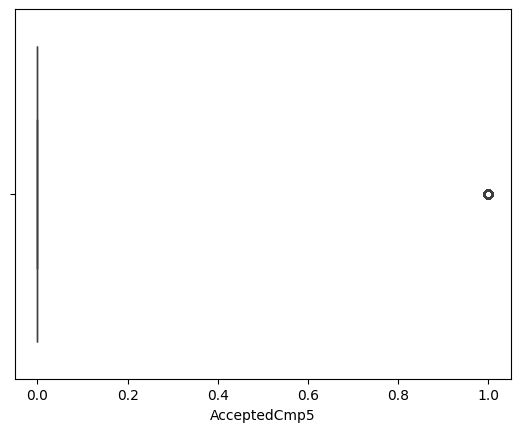

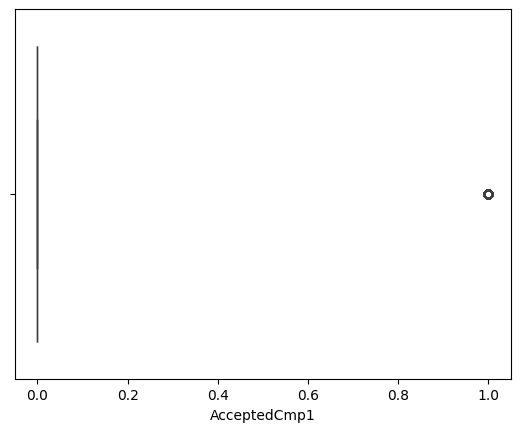

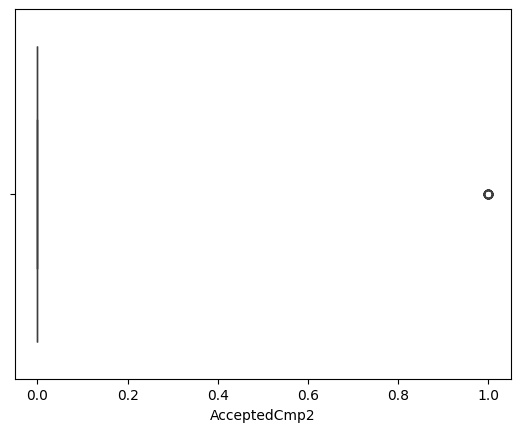

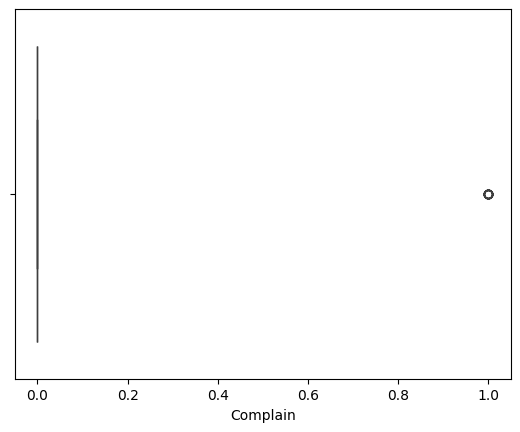

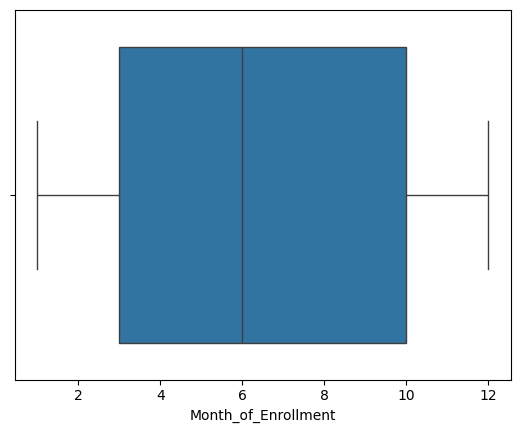

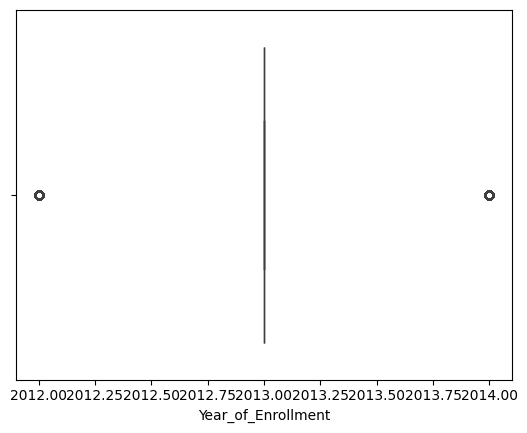

In [ ]:
# Outlier Detection using Boxplots -
for col in enumerate(df_num2):
    sns.boxplot(x=col[1],data=df_num2)
    plt.show()

Inference: The outliers of each attribut can be seen. For our analysis we have not removed any outlier.

# 2.# **Hypothesis testing**


**2.1 Is income of customers dependent on their education**

Here we can look at mean income of each group under Education. Then we can find if there is any significant difference between them. There are 5 different types of education category being considered.Since there are more than two samples and only only categorical value along with the numerical value,we will use One way Anova.
Significance level:0.05

To be able to do anova we need to check for the conditions:
Normality,
Equal Variance between groups


*   Ho: The mean income across different education group is same
*   Ha:The mean income across different education group has significant difference



In [ ]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test -

We will test the null hypothesis
>$H_0:$ Income follows normal distribution
against the alternative hypothesis
>$H_a:$ Income doesn't follow normal distribution

In [ ]:
# Assumption 1: Normality
from scipy.stats import shapiro
w, p_value = shapiro(df2['Income'].sample(1000))
print('The p-value is : ', p_value)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

The p-value is :  5.691306242077273e-15
Reject H0


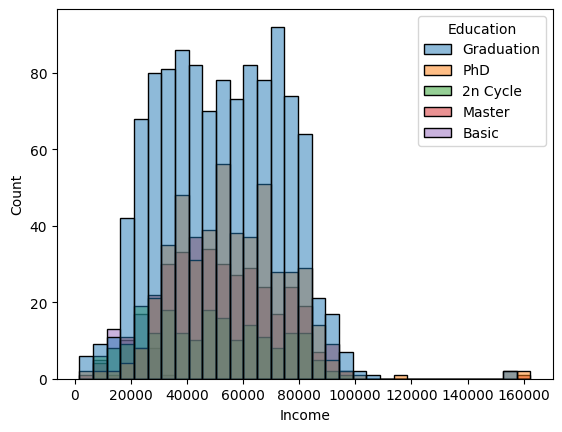

In [ ]:
# Normality test
Income=df2['Income']
sns.histplot(data=df2,x='Income',hue='Education')
plt.show()

Thus,Income population does not follow normal distribution.Though by Central Limit theorem eventually, as the sample size gets larger, the distribution of sample means will fall into a normal or near normal shape.

In [ ]:
#Levene's test
ed1_income=df2[df2['Education']=='Graduation']['Income']
ed2_income=df2[df2['Education']=='PhD']['Income']
ed3_income=df2[df2['Education']=='2n Cycle']['Income']
ed4_income=df2[df2['Education']=='Master']['Income']
ed5_income=df2[df2['Education']=='Basic']['Income']


In [ ]:
from scipy.stats import levene

#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(ed1_income,ed2_income,ed3_income,ed4_income,ed5_income)
print(p_value)

if p_value < 0.05:
  print("Reject H0: Variances are not equal")

1.928594481329233e-14
Reject H0: Variances are not equal


Here the assumptions of Anova fail,so we could do Kruskal Wallis test

In [ ]:
# H0: All education groups have same mean income
# Ha: One or more groups have different mean income
test,p_value=kruskal(ed1_income,ed2_income,ed3_income,ed4_income,ed5_income)
print(p_value)
if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

8.096174454524848e-30
Reject H0


Inference:Since we reject Null Hypthesis. The Alternate Hypothesis holds true.There there is significant difference between income for different Education groups.

In [ ]:
# Even though all the assumptions for Anova have failed we can  also go ahead with the Anova test.
#Anova Test
# H0: All education groups have same mean income
# Ha: One or more groups have different mean income

f_stats, p_value = f_oneway(ed1_income,ed2_income,ed3_income,ed4_income,ed5_income)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0


**2.2.Do higher income people spend more (take in account spending in all categories together)**

Here we can use a 2 sample right tailed Z test. The two samples are those of spending of higher income and lower income.


*   Ho:mean spending of higher(mu1) and lower income(mu2) are the same(mu1=mu2)
*   Ha: The mean spending of higher income group is greater than lower income(mu1>mu2)



In [ ]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Month_of_Enrollment,Year_of_Enrollment,income_bins
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,0,SP,6,2014,high_income
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,0,CA,6,2014,high_income
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,5,2014,high_income
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,5,2014,low_income
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,0,SP,4,2014,low_income


In [ ]:
#Add new coloumn for total spend by each user ID
df2['total_spend']=df2['MntWines']+df2['MntFruits']+df2['MntMeatProducts']+df2['MntFishProducts']+df2['MntSweetProducts']+df2['MntGoldProds']

In [ ]:
# import a library to perform a Z-test
from statsmodels.stats import weightstats as stests
from scipy import stats

In [ ]:

M1_data=df2[df2['income_bins']=='high_income']['total_spend']
M2_data=df2[df2['income_bins']=='low_income']['total_spend']

In [ ]:
z_score, pval = stests.ztest(x1 = M1_data, x2 = M2_data, value = 0, alternative = 'larger')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  52.277259499621316
p-value:  0.0


In [ ]:
#alpha=0.05
if pval < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


Inference: Thus we can conclude that the Alternate hypothesis holds true. Which implies that higher income people spend significantly more than lower income people.

**2.3.Do couples spend more or less money on wine than people living alone (set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone')**

In [ ]:
# Create a new coloumn to set 'Married','Together':'In couple' and 'Divorced','Single','Absurd','Widow','YOLO':'Alone'
df2['Couple_or_alone']=df2['Marital_Status'].apply(lambda x: 'Couple' if x in ['Married','Together'] else 'Alone')

In [ ]:
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Month_of_Enrollment,Year_of_Enrollment,income_bins,total_spend,Couple_or_alone
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,SP,6,2014,high_income,1190,Alone
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,0,CA,6,2014,high_income,577,Alone
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,5,2014,high_income,251,Couple
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,5,2014,low_income,11,Couple
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,SP,4,2014,low_income,91,Alone


Here we need to check if the mean spend on wine for the two samples couple and alone. Thus we can use a right tail 2 sample Z test.


*   Ho: The mean spend of alone on wine has no significant difference to that of couples(mu1=mu2)
*   Ha: The mean spend of alone(mu1) on wine is significantly greater than that of couples  (mu1>mu2)



In [ ]:
df2.groupby('Couple_or_alone')['MntWines'].mean()

,MntWines
Couple_or_alone,
Alone,306.665829
Couple,302.634096


In [ ]:

MM1_data=df2[df2['Couple_or_alone']=='Alone']['MntWines']
MM2_data=df2[df2['Couple_or_alone']=='Couple']['MntWines']

In [ ]:
z_score, pval = stests.ztest(x1 = MM1_data, x2 = MM2_data, value = 0, alternative = 'larger')

# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  0.2712259990062464
p-value:  0.393108608924765


In [ ]:
#alpha=0.05
if pval < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


Inference: Here we accept the null hypothesis ,therefore there is no significant difference in spending by couple or alone for wines.

**2.4.Are people with lower income are more attracted towards campaign or simply put accept more campaigns. ( create two income brackets one below median , other above median income and create a column which tells if they have ever accepted any campaign)**

In [ ]:
#Create new column which tells if customer has accepted campaign or not
df2['campaign_accepted']=(df2['AcceptedCmp1'])|(df2['AcceptedCmp2'])|(df2['AcceptedCmp3'])|(df2['AcceptedCmp4'])|(df2['AcceptedCmp5'])


In [ ]:
df2.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Country,Month_of_Enrollment,Year_of_Enrollment,income_bins,total_spend,Couple_or_alone,campaign_accepted
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,SP,6,2014,high_income,1190,Alone,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,0,CA,6,2014,high_income,577,Alone,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,5,2014,high_income,251,Couple,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,5,2014,low_income,11,Couple,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,SP,4,2014,low_income,91,Alone,1


Here we are checking of the income status and campaign acceptance are dependent or not. Since these are two categories we can use Chi square contingency test for Independence.


*   Ho:Income status is not dependent on campaign acceptance
*   Ha:Income status is  dependent on campaign acceptance



In [ ]:
from scipy.stats import chi2_contingency # statistical test for independence

In [ ]:
 val = pd.crosstab(index=df2["income_bins"], columns=df2["campaign_accepted"]).values
 print(val)

[[1002  118]
 [ 774  345]]


In [ ]:
pd.crosstab(index=df2["income_bins"], columns=df2["campaign_accepted"])

campaign_accepted,0,1
income_bins,,
low_income,1002,118
high_income,774,345


In [ ]:
df2.groupby('campaign_accepted')['income_bins'].value_counts()

campaign_accepted  income_bins
0                  low_income     1002
                   high_income     774
1                  high_income     345
                   low_income      118
Name: count, dtype: int64

In [ ]:
chi_stat, p_value, df2, exp_freq = chi2_contingency(val)

In [ ]:
chi_stat, p_value

(139.32899251470027, 3.7320719296764283e-32)

In [ ]:
if p_value < 0.05:
  print('Reject H0')
else:
  print ('Fail to Reject H0')
print(p_value)

Reject H0
3.7320719296764283e-32


Inference: Here we reject null hypothesis ,thus the income status is dependent on the campaign accepted status.Here from the cross tab we can see higher income people are more accepting campaigns.

# **Recommendations:**
•	There are many customers born in the 1970s that have made more purchases and hence that age group can be targeted.

•	Since higher income people spend more they can be made loyal customers by giving special loyalty privileges that encourage them to spend comfortably.Like a personal helper for shopping.

•	Since there is high number of married and together customers they can do targeted marketing offers for them.

•	Since most customers make atleast one a purchase in a month,end of the month offers will increase sales.

•	Can make bundled offers for meat and wine.

•	Web discounts can be given for families with teens.


In [ ]:
!jupyter nbconvert --to html /content/Ecommerce_BC2.ipynb

[NbConvertApp] Converting notebook /content/Ecommerce_BC2.ipynb to html
[NbConvertApp] Writing 2156283 bytes to /content/Ecommerce_BC2.html
